In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('diabetes_prediction_dataset1&2_comb.csv')
data.head(10)

,umur,bmi,gula_darah,diabetes
0,80.0,25.19,140,0
1,54.0,27.32,80,0
2,28.0,27.32,158,0
3,36.0,23.45,155,0
4,76.0,20.14,155,0
5,20.0,27.32,85,0
6,44.0,19.31,200,1
7,79.0,23.86,85,0
8,42.0,33.64,145,0
9,32.0,27.32,100,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   umur        1000 non-null   float64
 1   bmi         1000 non-null   float64
 2   gula_darah  1000 non-null   int64  
 3   diabetes    1000 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [5]:
atr_data = data.drop(columns='diabetes')
atr_data.head()

,umur,bmi,gula_darah
0,80.0,25.19,140
1,54.0,27.32,80
2,28.0,27.32,158
3,36.0,23.45,155
4,76.0,20.14,155


In [6]:
cls_data = data['diabetes']
cls_data.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(atr_data, cls_data, test_size=0.2, random_state=500)
tree_data = DecisionTreeClassifier(random_state=500)
tree_data.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=500)

In [16]:
print("Nilai akurasi pada data testing:", tree_data.score(xtest,ytest))

Nilai akurasi pada data testing: 0.77


In [17]:
from sklearn.tree import export_graphviz
export_graphviz(tree_data, out_file="tree_diabetes.dot", class_names=["1", "0"],
                feature_names=atr_data.columns, impurity=False, filled=True)

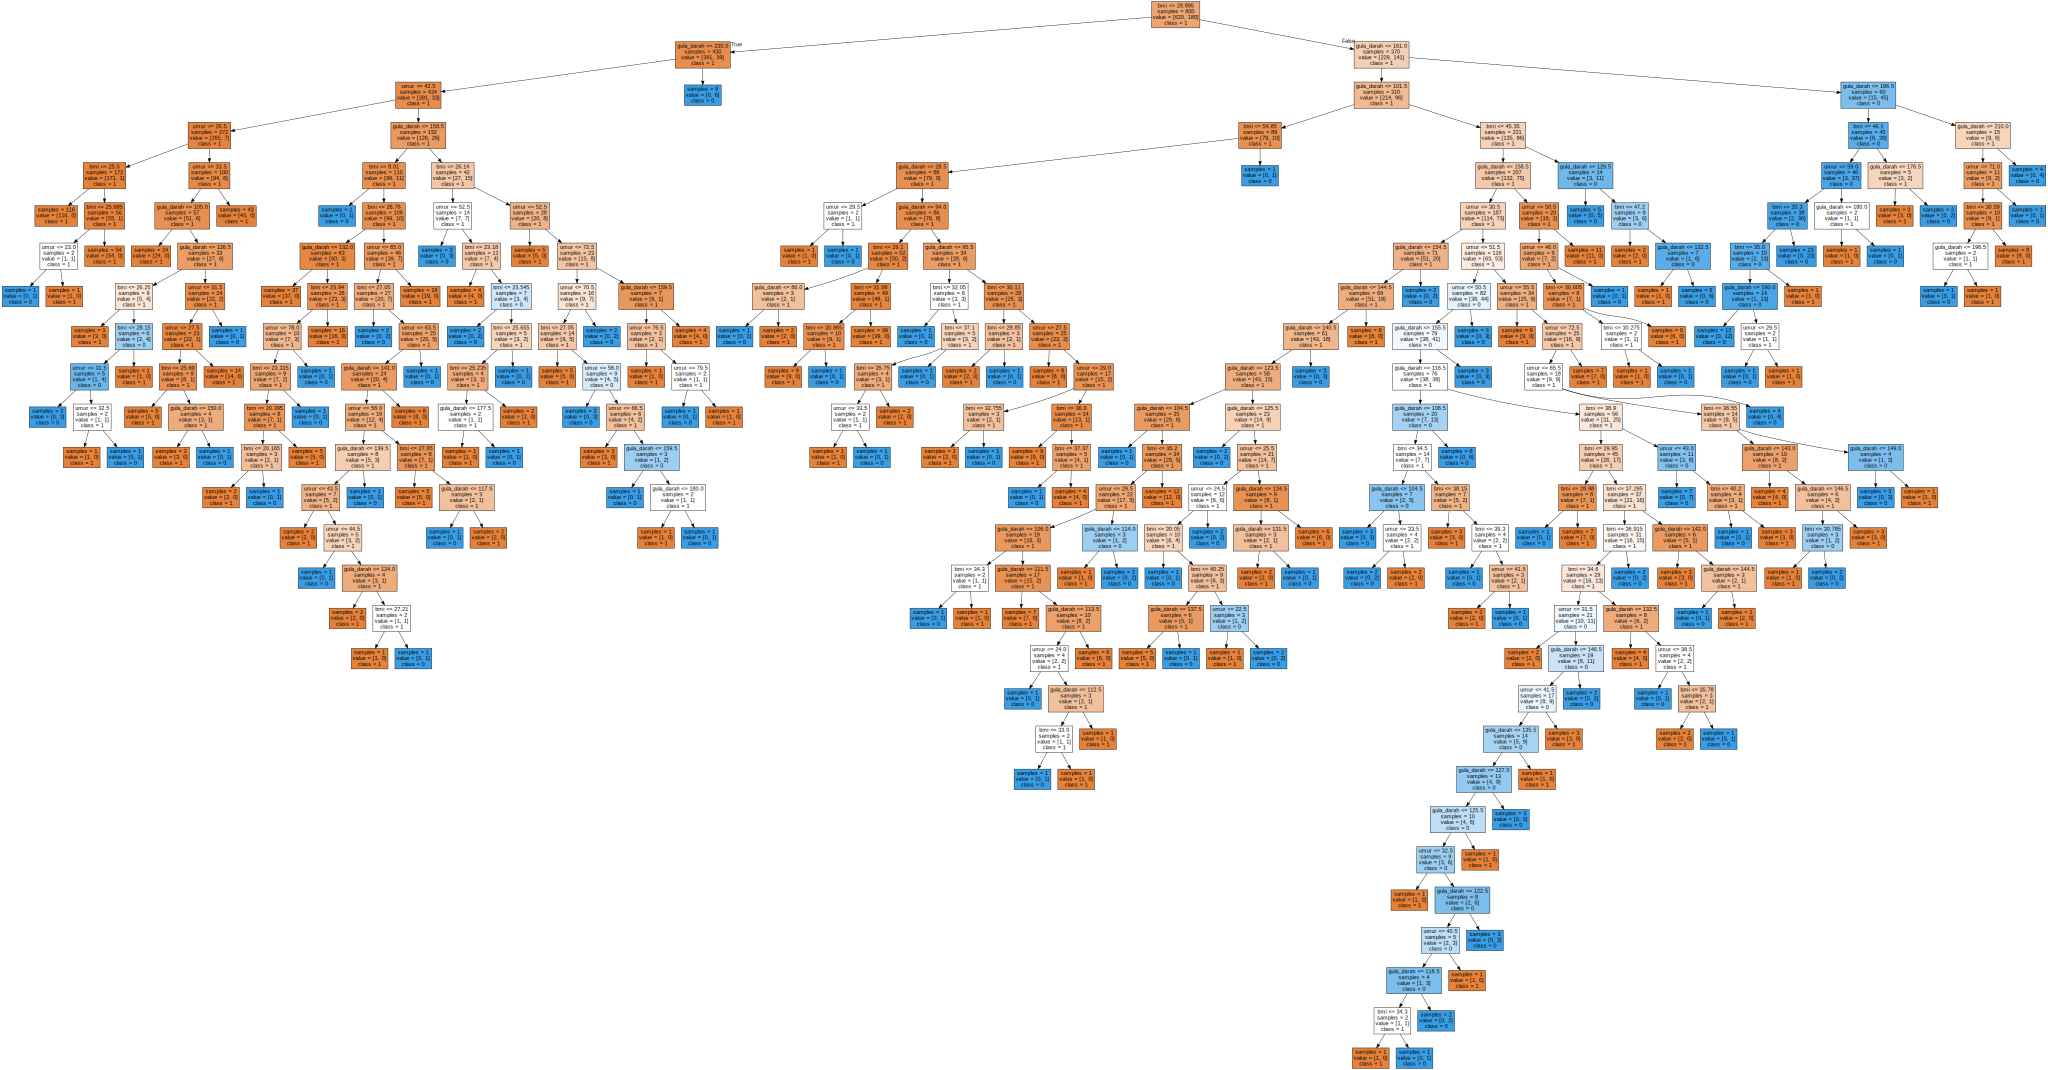

In [18]:
import graphviz

with open("tree_diabetes.dot") as fig:
  dot_graph = fig.read()
graphviz.Source(dot_graph)